# Инструменты обработки и визуализации данных
# Тема №2 – Исследование данных

## Библиотека Pandas

Библиотека Pandas содержит две удобных структуры данных для хранения и манипуляций с данными – объекты `Series` и `DataFrame`. Объект `Series` подобен одномерному массиву, в то время, как объект `DataFrame` более напоминает матрицу или таблицу.

In [1]:
import numpy as np
import pandas as pd

## Объект DataFrame

Объект `DataFrame` представляет собой табличную структуру данных, содержащую набор столбцов, каждый из которых может иметь различный тип (числовой, строковый, логический и т.п.). В отличие от объекта `Series` объект `DataFrame` имеет различные свойства для индексов строк (`.index`) и столбцов (`.columns`). Существуют различные способы создания объекта `DataFrame` (например, из словаря, списка кортежей или массивов ndarray).

In [2]:
cars = {'make': ['Ford', 'Honda', 'Toyota', 'Tesla'],
       'model': ['Taurus', 'Accord', 'Camry', 'Model S'],
       'MSRP': [27595, 23570, 23495, 68000]}          
carData = pd.DataFrame(cars)   # объект DataFrame из словаря
carData                        # вывод объекта DataFrame с форматированием

,make,model,MSRP
0,Ford,Taurus,27595
1,Honda,Accord,23570
2,Toyota,Camry,23495
3,Tesla,Model S,68000


In [3]:
print(carData) # вывод объекта DataFrame без форматирования при помощи print

     make    model   MSRP
0    Ford   Taurus  27595
1   Honda   Accord  23570
2  Toyota    Camry  23495
3   Tesla  Model S  68000


In [4]:
print(carData.index)       # индексы строк
print(carData.columns)     # индексы столбцов

RangeIndex(start=0, stop=4, step=1)
Index(['make', 'model', 'MSRP'], dtype='object')


In [5]:
carData.index = range(1,5) # изменяем индексы строк
carData['year'] = 2025     # добавляем столбец с одним и тем же значением
carData['dealer'] = ['Courtesy Ford','Capital Honda','Spartan Toyota','N/A']
carData                  

,make,model,MSRP,year,dealer
1,Ford,Taurus,27595,2025,Courtesy Ford
2,Honda,Accord,23570,2025,Capital Honda
3,Toyota,Camry,23495,2025,Spartan Toyota
4,Tesla,Model S,68000,2025,N/A


Объект `DataFrame` может быть создан из списка кортежей, при этом названия столбцов могут быть заданы при помощи свойства `columns`:

In [6]:
tuplelist = [(2019,7.3,32.4),(2020,5.8,34.5),(2021,8.4,39.2),
              (2022,6.8,31.4),(2023,4.4,29.8),(2024,5.3,36.7)]
columnNames = ['Год','Темп','Осадки']
weatherData = pd.DataFrame(tuplelist, columns=columnNames)
weatherData

,Год,Темп,Осадки
0,2019,7.3,32.4
1,2020,5.8,34.5
2,2021,8.4,39.2
3,2022,6.8,31.4
4,2023,4.4,29.8
5,2024,5.3,36.7


Объект `DataFrame` может быть создан из двумерного массива numpy (объекта `ndarray`):

In [7]:
npdata = np.random.randn(5,3)  # случайная матрица 5 на 3
columnNames = ['x1','x2','x3']
indexNames = range(1,6)
data = pd.DataFrame(npdata, index=indexNames, columns=columnNames)
data

,x1,x2,x3
1,0.316796,-0.783007,0.079046
2,0.165324,-0.204058,0.199837
3,0.143327,1.624121,0.398163
4,-0.035319,-0.464419,0.529683
5,0.325140,-0.914554,-0.947275


Объект `DataFrame` может быть создан из списка объектов `Series`:

In [8]:
series_1 = pd.Series([2023, 2024, 2025])
series_2 = pd.Series([1000., 1100., 1200.])
df = pd.DataFrame([series_1, series_2])
df

,0,1,2
0,2023.0,2024.0,2025.0
1,1000.0,1100.0,1200.0


Объект `DataFrame` может быть создан из словаря со списками в качестве значений:

In [9]:
years = [2023, 2024, 2025]
output = [1000., 1100., 1200.]
dict_lst = {'year': years, 'output': output}
pd.DataFrame(dict_lst)

,year,output
0,2023,1000.0
1,2024,1100.0
2,2025,1200.0


## Арифметические операции

In [10]:
data

,x1,x2,x3
1,0.316796,-0.783007,0.079046
2,0.165324,-0.204058,0.199837
3,0.143327,1.624121,0.398163
4,-0.035319,-0.464419,0.529683
5,0.325140,-0.914554,-0.947275


In [11]:
print("Данные:\n",data)

Данные:
          x1        x2        x3
1  0.316796 -0.783007  0.079046
2  0.165324 -0.204058  0.199837
3  0.143327  1.624121  0.398163
4 -0.035319 -0.464419  0.529683
5  0.325140 -0.914554 -0.947275


In [12]:
print('Транспонированные данные:')
print(data.T)    # транспонирование

Транспонированные данные:
           1         2         3         4         5
x1  0.316796  0.165324  0.143327 -0.035319  0.325140
x2 -0.783007 -0.204058  1.624121 -0.464419 -0.914554
x3  0.079046  0.199837  0.398163  0.529683 -0.947275


In [13]:
print('Сложение:')
print(data + 4)    # операция сложения

Сложение:
         x1        x2        x3
1  4.316796  3.216993  4.079046
2  4.165324  3.795942  4.199837
3  4.143327  5.624121  4.398163
4  3.964681  3.535581  4.529683
5  4.325140  3.085446  3.052725


In [14]:
print('Умножение:')
print(data * 10)   # операция умножения

Умножение:
         x1         x2        x3
1  3.167956  -7.830066  0.790465
2  1.653235  -2.040583  1.998374
3  1.433274  16.241215  3.981634
4 -0.353194  -4.644189  5.296828
5  3.251401  -9.145544 -9.472752


In [15]:
columnNames = ['x1','x2','x3']
data2 = pd.DataFrame(np.random.randn(5,3), columns=columnNames)
print('\ndata2 =')
print(data2)


data2 =
         x1        x2        x3
0 -0.147410  0.850592  0.296692
1 -1.254939  0.669194  1.563628
2 -0.517572 -0.040469 -1.243705
3 -0.966964 -0.010234  0.439558
4 -0.323019  0.036638 -2.142100


In [16]:
print('\ndata + data2 = ')
print(data+data2) # data.add(data2)

print('\ndata * data2 = ')
print(data*data2) # data.mul(data2)


data + data2 = 
         x1        x2        x3
0       NaN       NaN       NaN
1 -0.938143 -0.113813  1.642675
2 -0.352248 -0.244527 -1.043868
3 -0.823637  1.613887  0.837721
4 -0.358339 -0.427781 -1.612417
5       NaN       NaN       NaN

data * data2 = 
         x1        x2        x3
0       NaN       NaN       NaN
1 -0.397559 -0.523983  0.123599
2 -0.085567  0.008258 -0.248539
3 -0.138593 -0.016622  0.175016
4  0.011409 -0.017016 -1.134633
5       NaN       NaN       NaN


In [17]:
print(data.abs())    # абсолютное значение по каждому элементу

         x1        x2        x3
1  0.316796  0.783007  0.079046
2  0.165324  0.204058  0.199837
3  0.143327  1.624121  0.398163
4  0.035319  0.464419  0.529683
5  0.325140  0.914554  0.947275


In [18]:
print('\nМаксимальное значение по столбцам:')
print(data.max()) # максимальное значение по каждому столбцу (axis=0)


Максимальное значение по столбцам:
x1    0.325140
x2    1.624121
x3    0.529683
dtype: float64


In [19]:
print('\nМинимальное значение по строкам:')
print(data.min(axis=1)) # минимальное значение по каждой строке


Минимальное значение по строкам:
1   -0.783007
2   -0.204058
3    0.143327
4   -0.464419
5   -0.947275
dtype: float64


In [20]:
print('\nСумма значений по столбцам:')
print(data.sum()) # найти сумму значений для каждого столбца


Сумма значений по столбцам:
x1    0.915267
x2   -0.741917
x3    0.259455
dtype: float64


In [21]:
print('\nСреднее значение по строкам:')
print(data.mean(axis=1)) # найти среднее значение для каждой строки


Среднее значение по строкам:
1   -0.129055
2    0.053701
3    0.721871
4    0.009981
5   -0.512230
dtype: float64


In [22]:
print('\nВычислить max - min по столбцам')
f = lambda x: x.max() - x.min()
print(data.apply(f))

print('\nВычислить max - min по строкам')
f = lambda x: x.max() - x.min()
print(data.apply(f, axis=1))


Вычислить max - min по столбцам
x1    0.360459
x2    2.538676
x3    1.476958
dtype: float64

Вычислить max - min по строкам
1    1.099802
2    0.403896
3    1.480794
4    0.994102
5    1.272415
dtype: float64


### Загрузка объекта DataFrame из файла

Считаем таблицу из файла `sp500.csv` со следующими столбцами:

| Имя столбца        | Описание
| ------------- |:-------------:|
|Symbol|Сокращенное название организации|
|Name|Полное название организации|
|Sector|Сектор экономики|
|Price|Стоимость акции|
|Dividend Yield|Дивидендная доходность|
|Price/Earnings|Цена / прибыль|
|Earnings/Share|Прибыль на акцию|
|Book Value|Балансовая стоимость компании|
|52 week low|52-недельный минимум|
|52 week high|52-недельный максимум|
|Market Cap|Рыночная капитализация|
|EBITDA|**E**arnings **b**efore **i**nterest, **t**axes, **d**epreciation and **a**mortization|
|Price/Sales|Цена / объём продаж|
|Price/Book|Цена / балансовая стоимость|
|SEC Filings|Ссылка на *sec.gov*|

In [23]:
pd.read_csv("sp500.csv")

,Symbol,Name,Sector,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Co.,Industrials,141.14,2.12,20.33,6.900,26.668,107.15,143.37,92.345,8.1210,2.95,5.26,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,ABT,Abbott Laboratories,Health Care,39.60,1.82,25.93,1.529,15.573,32.70,40.49,59.477,4.3590,2.74,2.55,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABBV,AbbVie Inc.,Health Care,53.95,3.02,20.87,2.570,2.954,40.10,54.78,85.784,7.1900,4.48,18.16,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ACN,Accenture,Information Technology,79.79,2.34,19.53,4.068,8.326,69.00,85.88,50.513,4.4230,1.75,9.54,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACE,ACE Limited,Financials,102.91,2.21,10.00,10.293,86.897,84.73,104.07,34.753,4.2750,1.79,1.18,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,YHOO,Yahoo Inc.,Information Technology,35.02,NaN,28.94,1.199,12.768,23.82,41.72,35.258,0.8873,7.48,2.72,http://www.sec.gov/cgi-bin/browse-edgar?action...
496,YUM,Yum! Brands Inc,Consumer Discretionary,74.77,1.93,29.86,2.507,5.147,64.08,79.70,33.002,2.8640,2.49,14.55,http://www.sec.gov/cgi-bin/browse-edgar?action...
497,ZMH,Zimmer Holdings,Health Care,101.84,0.81,22.92,4.441,37.181,74.55,108.33,17.091,1.6890,3.68,2.74,http://www.sec.gov/cgi-bin/browse-edgar?action...
498,ZION,Zions Bancorp,Financials,28.43,0.56,18.82,1.511,30.191,26.39,33.33,5.257,0.0000,2.49,0.94,http://www.sec.gov/cgi-bin/browse-edgar?action...


В качестве разделителя между значениями используется запятая, названия столбцов берутся из первой строки файла. Если используем другой разделитель (`;`), то данные не загрузятся корректно:

In [24]:
pd.read_csv(filepath_or_buffer = "sp500.csv", sep = ';')

,"Symbol,Name,Sector,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings"
0,"MMM,3M Co.,Industrials,141.14,2.12,20.33,6.90,..."
1,"ABT,Abbott Laboratories,Health Care,39.60,1.82..."
2,"ABBV,AbbVie Inc.,Health Care,53.95,3.02,20.87,..."
3,"ACN,Accenture,Information Technology,79.79,2.3..."
4,"ACE,ACE Limited,Financials,102.91,2.21,10.00,1..."
...,...
495,"YHOO,Yahoo Inc.,Information Technology,35.02,,..."
496,"YUM,Yum! Brands Inc,Consumer Discretionary,74...."
497,"ZMH,Zimmer Holdings,Health Care,101.84,0.81,22..."
498,"ZION,Zions Bancorp,Financials,28.43,0.56,18.82..."


Можем при загрузке ограничиться определенным количеством записей (параметр `nrows`):

In [25]:
pd.read_csv(filepath_or_buffer = "sp500.csv", sep = ',', nrows = 3)

,Symbol,Name,Sector,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Co.,Industrials,141.14,2.12,20.33,6.900,26.668,107.15,143.37,92.345,8.121,2.95,5.26,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,ABT,Abbott Laboratories,Health Care,39.60,1.82,25.93,1.529,15.573,32.70,40.49,59.477,4.359,2.74,2.55,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABBV,AbbVie Inc.,Health Care,53.95,3.02,20.87,2.570,2.954,40.10,54.78,85.784,7.190,4.48,18.16,http://www.sec.gov/cgi-bin/browse-edgar?action...


Можно подгрузить не все, а только некоторые столбцы (параметр `usecols`):

In [26]:
pd.read_csv(filepath_or_buffer = "sp500.csv",
           sep = ',',
           nrows = 3,
           usecols=['Symbol', 'Sector', 'Price', 'Book Value'])

,Symbol,Sector,Price,Book Value
0,MMM,Industrials,141.14,26.668
1,ABT,Health Care,39.60,15.573
2,ABBV,Health Care,53.95,2.954


Можем при считывании данных сразу назначить индекс:

In [27]:
sp500 = pd.read_csv(filepath_or_buffer = "sp500.csv",
           sep = ',',
           usecols=['Symbol', 'Sector', 'Price', 'Book Value'],
           index_col='Symbol')
sp500

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897
...,...,...,...
YHOO,Information Technology,35.02,12.768
YUM,Consumer Discretionary,74.77,5.147
ZMH,Health Care,101.84,37.181


Датафрейм может содержать столбцы разных типов. Для контроля типов столбцов можно использовать свойство `dtypes`:

In [28]:
sp500.dtypes

Sector         object
Price         float64
Book Value    float64
dtype: object

Для подсчета количества уникальных элементов можно использовать метод `nunique()`:

In [29]:
sp500.nunique()

Sector         13
Price         495
Book Value    495
dtype: int64

Также для получения информации об объекте `DataFrame` можно использовать метод `info()`:

In [30]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, MMM to ZTS
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sector      500 non-null    object 
 1   Price       500 non-null    float64
 2   Book Value  499 non-null    float64
dtypes: float64(2), object(1)
memory usage: 15.6+ KB


### Обращение к данным DataFrame

Для обращения первым/последним строкам объекта `DataFrame` можно использовать методы `head()/tail()`: 

In [31]:
sp500.head() # по умолчанию 5 строк

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897


In [32]:
sp500.tail(3) # последние 3 строки

,Sector,Price,Book Value
Symbol,,,
ZMH,Health Care,101.84,37.181
ZION,Financials,28.43,30.191
ZTS,Health Care,30.53,2.150


Для обращения к столбцу объекта `DataFrame` можно использовать имя столбца (получаем объект `Series`):

In [33]:
sp500.Price.head(3)

Symbol
MMM     141.14
ABT      39.60
ABBV     53.95
Name: Price, dtype: float64

In [34]:
sp500['Book Value'].head(3)

Symbol
MMM     26.668
ABT     15.573
ABBV     2.954
Name: Book Value, dtype: float64

Если необходимо получить датафрейм с одним столбцом, то можно обратиться к столбцу так:

In [35]:
sp500[['Sector']]

,Sector
Symbol,
MMM,Industrials
ABT,Health Care
ABBV,Health Care
ACN,Information Technology
ACE,Financials
...,...
YHOO,Information Technology
YUM,Consumer Discretionary
ZMH,Health Care


При выборе строк и/или столбцов объекта `DataFrame` можно использовать индексаторы `.loc` и `.iloc`. Индексатор `.loc` выбирает данные по меткам строк и столбцов, а индексатор `.iloc` использует номера (позиции) строк и столбцов, которые необходимо выбрать.

Общая форма обращения:
```python
df.iloc[row_selection, column_selection]
```

In [36]:
sp500.loc['MMM'] # строка представлена как объект Series

Sector        Industrials
Price              141.14
Book Value         26.668
Name: MMM, dtype: object

In [37]:
sp500.iloc[-1] # строка представлена как объект Series

Sector        Health Care
Price               30.53
Book Value           2.15
Name: ZTS, dtype: object

In [38]:
sp500.loc[['ABT','ABBV']] # список строк представлен как объект DataFrame

,Sector,Price,Book Value
Symbol,,,
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954


In [39]:
sp500.loc['ABT':'ACE'] # можно использовать срез для меток

,Sector,Price,Book Value
Symbol,,,
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897


In [40]:
sp500.iloc[[-3,-1]] # список для индексатора iloc

,Sector,Price,Book Value
Symbol,,,
ZMH,Health Care,101.84,37.181
ZTS,Health Care,30.53,2.150


In [41]:
sp500.iloc[-3:] # срез для индексатора iloc

,Sector,Price,Book Value
Symbol,,,
ZMH,Health Care,101.84,37.181
ZION,Financials,28.43,30.191
ZTS,Health Care,30.53,2.150


Для обращения к столбцам действуем так: 

In [42]:
sp500.iloc[:,1]

Symbol
MMM     141.14
ABT      39.60
ABBV     53.95
ACN      79.79
ACE     102.91
         ...  
YHOO     35.02
YUM      74.77
ZMH     101.84
ZION     28.43
ZTS      30.53
Name: Price, Length: 500, dtype: float64

In [43]:
sp500.iloc[:,1:]

,Price,Book Value
Symbol,,
MMM,141.14,26.668
ABT,39.60,15.573
ABBV,53.95,2.954
ACN,79.79,8.326
ACE,102.91,86.897
...,...,...
YHOO,35.02,12.768
YUM,74.77,5.147
ZMH,101.84,37.181


Если обращаемся к несуществующей метке или позиции, то получаем исключение: 

In [44]:
try:
    sp500.loc['Z']
except Exception as err:
    print(f"Ошибка {err=} с типом {type(err)=}")

Ошибка err=KeyError('Z') с типом type(err)=<class 'KeyError'>


In [45]:
try:
    sp500.iloc[1000]
except Exception as err:
    print(f"Ошибка {err=} с типом {type(err)=}")

Ошибка err=IndexError('single positional indexer is out-of-bounds') с типом type(err)=<class 'IndexError'>


Для поиска позиции строки (записи) с заданной меткой можно использовать метод `get_loc()`: 

In [46]:
iMSFT = sp500.index.get_loc('MSFT')
sp500.iloc[[iMSFT]]

,Sector,Price,Book Value
Symbol,,,
MSFT,Information Technology,40.12,10.584


Можно найти значение по метке строки и метке (имени) столбца:

In [47]:
sp500.at['MSFT', 'Price']

np.float64(40.12)

Можно извлечь значение по позициям (номерам) строки и столбца:

In [48]:
sp500.iat[250, 1]

np.float64(54.53)

Можно выполнить одновременный отбор строк и столбцов по меткам или позициям:

In [49]:
sp500.loc[['AAPL', 'MSFT']]

,Sector,Price,Book Value
Symbol,,,
AAPL,Information Technology,614.13,139.460
MSFT,Information Technology,40.12,10.584


In [50]:
sp500.loc[['AAPL', 'MSFT']][['Price', 'Book Value']]

,Price,Book Value
Symbol,,
AAPL,614.13,139.460
MSFT,40.12,10.584


Иначе можно выполнить отбор по меткам так:

In [51]:
sp500.loc[['AAPL', 'MSFT'], ['Price', 'Book Value']]

,Price,Book Value
Symbol,,
AAPL,614.13,139.460
MSFT,40.12,10.584


А теперь отбор по позициям строк и столбцов:

In [52]:
sp500.index.get_loc('AAPL'), sp500.index.get_loc('MSFT')

(40, 302)

In [53]:
sp500.iloc[[40, 302], [1, 2]]

,Price,Book Value
Symbol,,
AAPL,614.13,139.460
MSFT,40.12,10.584


#### Срезы данных

Задаём срез для числовых данных (целых чисел) по правилу: 

__[начальная позиция: конечная позиция: шаг]__, 

при этом:
- конечная позиция - не включается
- шаг может быть отрицательным
- начальная/конечная позиция также может быть отрицательной - тогда отсчёт происходит "с другого конца"
- нумерация начинается с нуля

Срезы работают для объектов `Series`:

In [54]:
prices = sp500.Price
prices # объект Series

Symbol
MMM     141.14
ABT      39.60
ABBV     53.95
ACN      79.79
ACE     102.91
         ...  
YHOO     35.02
YUM      74.77
ZMH     101.84
ZION     28.43
ZTS      30.53
Name: Price, Length: 500, dtype: float64

In [55]:
prices.iloc[1::2]

Symbol
ABT      39.60
ACN      79.79
ACT     213.77
AES      13.61
AFL      61.31
         ...  
XRX      12.06
XL       32.47
YHOO     35.02
ZMH     101.84
ZTS      30.53
Name: Price, Length: 250, dtype: float64

In [56]:
prices.iloc[-1:-11:-1]

Symbol
ZTS      30.53
ZION     28.43
ZMH     101.84
YUM      74.77
YHOO     35.02
XYL      38.42
XL       32.47
XLNX     46.03
XRX      12.06
XEL      30.24
Name: Price, dtype: float64

Также срезы работают для объектов `DaraFrame`:

In [57]:
sp500.iloc[-1::-10].head()

,Sector,Price,Book Value
Symbol,,,
ZTS,Health Care,30.53,2.150
WYNN,Consumer Discretionary,207.86,-0.719
WLP,Health Care,108.82,86.358
VFC,Consumer Discretionary,62.72,13.285
UNH,Health Care,78.77,33.078


Срезы можно применять и к столбцам:

In [58]:
sp500.iloc[-1::-1,-1::-1].head()

,Book Value,Price,Sector
Symbol,,,
ZTS,2.150,30.53,Health Care
ZION,30.191,28.43,Financials
ZMH,37.181,101.84,Health Care
YUM,5.147,74.77,Consumer Discretionary
YHOO,12.768,35.02,Information Technology


Срезы (с несколько отличающимся функционалом) работают и для меток:

In [59]:
sp500.loc['AAPL':'MSFT':2]

,Sector,Price,Book Value
Symbol,,,
AAPL,Information Technology,614.13,139.460
ADM,Consumer Staples,43.56,30.569
T,Telecommunications Services,35.32,17.500
ADP,Information Technology,78.85,13.729
AZO,Consumer Discretionary,540.90,-51.275
...,...,...,...
MJN,Consumer Staples,86.19,1.712
MDT,Health Care,59.93,19.462
MET,Financials,50.76,58.461


При использовании срезов, как правило, возникает ссылка на первоначальные данные.

In [60]:
pr5 = prices.iloc[range(5)] # не срез!
pr5

Symbol
MMM     141.14
ABT      39.60
ABBV     53.95
ACN      79.79
ACE     102.91
Name: Price, dtype: float64

In [61]:
pr5.iloc[:] = 0.
pr5

Symbol
MMM     0.0
ABT     0.0
ABBV    0.0
ACN     0.0
ACE     0.0
Name: Price, dtype: float64

В `pr5` цены обнулились, но в `prices` цены остались прежними:

In [62]:
prices

Symbol
MMM     141.14
ABT      39.60
ABBV     53.95
ACN      79.79
ACE     102.91
         ...  
YHOO     35.02
YUM      74.77
ZMH     101.84
ZION     28.43
ZTS      30.53
Name: Price, Length: 500, dtype: float64

Теперь воспользуемся срезом:

In [63]:
pr5 = prices.iloc[range(5)] # резервная копия
pr5slice = prices.iloc[0:5] # срез!
pr5slice.iloc[:] = 0.
prices

Symbol
MMM       0.00
ABT       0.00
ABBV      0.00
ACN       0.00
ACE       0.00
         ...  
YHOO     35.02
YUM      74.77
ZMH     101.84
ZION     28.43
ZTS      30.53
Name: Price, Length: 500, dtype: float64

Цены в `prices` обнулились, так как `pr5slice` представляет собой ссылку на данные в `prices`. Восстанавливаем данные из копии в переменной `pr5`:

In [64]:
pr5slice.iloc[:] = pr5
prices

Symbol
MMM     141.14
ABT      39.60
ABBV     53.95
ACN      79.79
ACE     102.91
         ...  
YHOO     35.02
YUM      74.77
ZMH     101.84
ZION     28.43
ZTS      30.53
Name: Price, Length: 500, dtype: float64

#### Удаление данных

Существуют различные способы удаления данных из датафрейма.

* команда `del`

In [65]:
pr5 = prices.iloc[range(5)]
del pr5['MMM']
pr5

Symbol
ABT      39.60
ABBV     53.95
ACN      79.79
ACE     102.91
Name: Price, dtype: float64

Для датафрейма команда `del` вызывает удаление столбца. Также столбец может быть удален методом `pop()`:

In [66]:
sp500_copy = sp500.copy()
sector_col = sp500_copy.pop('Sector')
sector_col

Symbol
MMM                Industrials
ABT                Health Care
ABBV               Health Care
ACN     Information Technology
ACE                 Financials
                 ...          
YHOO    Information Technology
YUM     Consumer Discretionary
ZMH                Health Care
ZION                Financials
ZTS                Health Care
Name: Sector, Length: 500, dtype: object

In [67]:
sp500_copy

,Price,Book Value
Symbol,,
MMM,141.14,26.668
ABT,39.60,15.573
ABBV,53.95,2.954
ACN,79.79,8.326
ACE,102.91,86.897
...,...,...
YHOO,35.02,12.768
YUM,74.77,5.147
ZMH,101.84,37.181


* метод `drop()` (применим как к строкам, когда `axis=0`, так и столбцам, когда `axis=1`)

По умолчанию изменения производятся в возвращаемой копии датафрейма, чтобы изменения производились в самом датафрейме применяется ключ `inplace=True`.

In [68]:
sp500_copy = sp500.copy()
sp500_copy.drop(['ABBV', 'ABT'], axis=0, inplace=True) # удаляем строки с метками
sp500_copy

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897
ACT,Health Care,213.77,55.188
ADBE,Information Technology,64.30,13.262
...,...,...,...
YHOO,Information Technology,35.02,12.768
YUM,Consumer Discretionary,74.77,5.147
ZMH,Health Care,101.84,37.181


In [69]:
sp500_copy.drop(['Sector'], axis=1, inplace=True) # удаляем столбец
sp500_copy

,Price,Book Value
Symbol,,
MMM,141.14,26.668
ACN,79.79,8.326
ACE,102.91,86.897
ACT,213.77,55.188
ADBE,64.30,13.262
...,...,...
YHOO,35.02,12.768
YUM,74.77,5.147
ZMH,101.84,37.181


### Фильтрация данных по условию

Series

In [70]:
prices90_100 = (prices > 90.) & (prices < 100.)
prices90_100

Symbol
MMM     False
ABT     False
ABBV    False
ACN     False
ACE     False
        ...  
YHOO    False
YUM     False
ZMH     False
ZION    False
ZTS     False
Name: Price, Length: 500, dtype: bool

In [71]:
prices[prices90_100]

Symbol
APH     95.71
APA     90.18
BF-B    91.42
CB      91.81
FRX     95.57
HSY     97.04
HON     91.97
IFF     98.86
LYB     98.78
KORS    96.40
NEE     96.46
NSC     99.20
OXY     96.97
RTN     97.03
SNDK    94.27
SRE     99.14
SIAL    97.69
SJM     99.12
TIF     96.59
TRV     92.86
TRIP    94.42
Name: Price, dtype: float64

Также для фильтрации данных можно использовать метод `where()` (не путать с функцией `where()` из NumPy):

In [72]:
prices.where(prices > 100.)

Symbol
MMM     141.14
ABT        NaN
ABBV       NaN
ACN        NaN
ACE     102.91
         ...  
YHOO       NaN
YUM        NaN
ZMH     101.84
ZION       NaN
ZTS        NaN
Name: Price, Length: 500, dtype: float64

Вместо значения `NaN` (Not-a-Number) можно использовать другое значение, скажем, `-1`:

In [73]:
prices.where(prices > 100., other=-1)

Symbol
MMM     141.14
ABT      -1.00
ABBV     -1.00
ACN      -1.00
ACE     102.91
         ...  
YHOO     -1.00
YUM      -1.00
ZMH     101.84
ZION     -1.00
ZTS      -1.00
Name: Price, Length: 500, dtype: float64

Проверяем, все ли элементы в `prices` удовлетворяют условию:

In [74]:
(prices < 200.).all()

np.False_

Проверяем, есть ли хотя бы один элемент в `prices`, удовлетворяющий условию:

In [75]:
(prices > 250.).any()

np.True_

Вычисляем, сколько элементов в `prices` удовлетворяет условию:

In [76]:
(prices > 250.).sum()

np.int64(13)

При работе с датафреймами возможности фильтрации данных сохраняются.

In [77]:
sp500[sp500.Price > 250.]

,Sector,Price,Book Value
Symbol,,,
AMZN,Consumer Discretionary,312.24,22.452
AAPL,Information Technology,614.13,139.460
AZO,Consumer Discretionary,540.90,-51.275
BIIB,Health Care,299.71,38.519
BLK,Financials,300.69,156.547
CMG,Consumer Discretionary,522.32,52.915
GOOG,Information Technology,552.70,135.977
GHC,Consumer Discretionary,677.29,0.000
GWW,Industrials,253.23,47.466


Извлечем строки, в которых переменная `Sector` принимает значение `Information Technology`, а переменная `Price` больше или равна 250., и оставим столбцы `Price` и `Sector`:

In [78]:
sp500[(sp500.Sector == 'Information Technology') & 
          (sp500.Price >= 250.00)] [['Price', 'Sector']]

,Price,Sector
Symbol,,
AAPL,614.13,Information Technology
GOOG,552.70,Information Technology
NFLX,402.35,Information Technology


Если для столбца с категориальными (текстовыми) значениями проверяется равенство одному из нескольких значений, то может быть полезен метод `isin()`: 

In [79]:
sect_IT_Fin = sp500.Sector.isin(['Information Technology', 'Financials'])
sp500[sect_IT_Fin].head()

,Sector,Price,Book Value
Symbol,,,
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897
ADBE,Information Technology,64.30,13.262
AFL,Financials,61.31,34.527
AKAM,Information Technology,53.65,15.193


Также для фильтрации данных может применяться метод `query()`, в котором условие фильтрации задается как символьная строка: 

In [80]:
sp500.query("Sector=='Financials' & Price >= 150.")[['Price', 'Book Value']]

,Price,Book Value
Symbol,,
BLK,300.69,156.547
GS,160.16,154.688
ICE,192.67,111.336
PSA,171.37,30.051
SPG,175.26,18.767


### Сортировка данных

Сортировка данных датафрейма возможна по индексу и по значению.

In [81]:
sp500.sort_index().head()

,Sector,Price,Book Value
Symbol,,,
A,Health Care,56.18,16.928
AA,Materials,13.52,9.670
AAPL,Information Technology,614.13,139.460
ABBV,Health Care,53.95,2.954
ABC,Health Care,71.64,9.430


In [82]:
sp500.sort_index(axis=1).head()

,Book Value,Price,Sector
Symbol,,,
MMM,26.668,141.14,Industrials
ABT,15.573,39.60,Health Care
ABBV,2.954,53.95,Health Care
ACN,8.326,79.79,Information Technology
ACE,86.897,102.91,Financials


In [83]:
sp500.sort_values(by='Price').head()

,Sector,Price,Book Value
Symbol,,,
BEAM,Consumer Discretionary,0.00,NaN
FTR,Telecommunications Services,5.81,3.989
SLM,Financials,8.82,11.895
HBAN,Financials,9.10,6.995
WIN,Telecommunications Services,9.38,1.199


In [84]:
sp500.sort_values(by='Price', ascending=False).head()

,Sector,Price,Book Value
Symbol,,,
PCLN,Industrials,1197.12,137.886
GHC,Consumer Discretionary,677.29,0.000
AAPL,Information Technology,614.13,139.460
GOOG,Information Technology,552.70,135.977
AZO,Consumer Discretionary,540.90,-51.275


Также можно извлечь нужно число записей с наименьшими/наибольшими значениями:

In [85]:
sp500.nsmallest(5, 'Book Value')

,Sector,Price,Book Value
Symbol,,,
AZO,Consumer Discretionary,540.90,-51.275
DNB,Industrials,104.83,-28.871
CVC,Consumer Discretionary,17.45,-19.304
DTV,Consumer Discretionary,83.59,-13.589
LO,Consumer Staples,60.20,-5.953


In [86]:
sp500.nlargest(3, 'Book Value')

,Sector,Price,Book Value
Symbol,,,
BRK-B,Financials,126.80,138425.4531
BLK,Financials,300.69,156.5470
GS,Financials,160.16,154.6880


## Индекс датафрейма

Продемонстрируем важность выбора индекса на следующем примере.

In [87]:
np.random.seed(2022)
df = pd.DataFrame({'value':np.random.random(10000), 'key':range(100, 10100)})
df.head(3)

,value,key
0,0.009359,100
1,0.499058,101
2,0.113384,102


Отберем строку со значением столбца `key` равным 2022, измеряя время выполнения операции отбора:

In [88]:
%timeit df[df.key==2025]

54.9 μs ± 1.41 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Превратим столбец `key` в индекс датафрейма `df_key`:

In [89]:
df_key = df.set_index(['key'])
df_key.head(3)

,value
key,
100,0.009359
101,0.499058
102,0.113384


Отберем строку со значением столбца `key` равным 2025 при помощи индекса:

In [90]:
%timeit df_key.loc[2025]

6.01 μs ± 86.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Таким образом, использование индекса ускорило отбор данных почти в 5 раз.

В датафрейме можно сбрасывать и устанавливать индекс:

In [91]:
sp500.reset_index(inplace=True)
sp500

,Symbol,Sector,Price,Book Value
0,MMM,Industrials,141.14,26.668
1,ABT,Health Care,39.60,15.573
2,ABBV,Health Care,53.95,2.954
3,ACN,Information Technology,79.79,8.326
4,ACE,Financials,102.91,86.897
...,...,...,...,...
495,YHOO,Information Technology,35.02,12.768
496,YUM,Consumer Discretionary,74.77,5.147
497,ZMH,Health Care,101.84,37.181
498,ZION,Financials,28.43,30.191


In [92]:
sp500.set_index('Sector', inplace=True)
sp500

,Symbol,Price,Book Value
Sector,,,
Industrials,MMM,141.14,26.668
Health Care,ABT,39.60,15.573
Health Care,ABBV,53.95,2.954
Information Technology,ACN,79.79,8.326
Financials,ACE,102.91,86.897
...,...,...,...
Information Technology,YHOO,35.02,12.768
Consumer Discretionary,YUM,74.77,5.147
Health Care,ZMH,101.84,37.181


Индекс может быть иерархическим (составным):

In [93]:
sp500.reset_index(inplace=True)
sp500.set_index(['Sector','Symbol'], inplace=True)
sp500

Price  Book Value
Sector                 Symbol                    
Industrials            MMM     141.14      26.668
Health Care            ABT      39.60      15.573
                       ABBV     53.95       2.954
Information Technology ACN      79.79       8.326
Financials             ACE     102.91      86.897
...                               ...         ...
Information Technology YHOO     35.02      12.768
Consumer Discretionary YUM      74.77       5.147
Health Care            ZMH     101.84      37.181
Financials             ZION     28.43      30.191
Health Care            ZTS      30.53       2.150

[500 rows x 2 columns]

## Загрузка набора данных "Ирисы"

Считаем набор данных “Ирисы” из файла `iris.csv` при помощи пакета Pandas:

In [94]:
# считываем данные из файла в объект DataFrame # , prefix="V"
df = pd.read_csv( 
    "iris.csv", header=None, names=['V0','V1','V2','V3','V4'] 
) 
df

,V0,V1,V2,V3,V4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [95]:
df.head(3)

,V0,V1,V2,V3,V4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [96]:
df.tail(10)

,V0,V1,V2,V3,V4
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      150 non-null    float64
 1   V1      150 non-null    float64
 2   V2      150 non-null    float64
 3   V3      150 non-null    float64
 4   V4      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Отбор числовых и нечисловых признаков:

In [98]:
df['V4']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: V4, Length: 150, dtype: object

In [99]:
df[['V0','V1','V2','V3']]

,V0,V1,V2,V3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [100]:
df.drop(['V4'],axis=1)

,V0,V1,V2,V3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [101]:
df_num = df.drop(['V4'],axis=1)

### Дескриптивный анализ

Дескриптивный (описательный) анализ (аналитика, статистика) – это разновидность анализа данных, ориентированная на сбор, систематизацию и обобщение данных с целью обнаружения в них интерпретируемых зависимостей и закономерностей.

1. Значения данных и их частоты

Таблица частот (для нечисловых признаков) может быть построена следующей командой:

In [102]:
df['V4'].value_counts()

V4
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [103]:
df['V4'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

2. Средние значения (центральная тенденция) данных

In [104]:
df_num.mean()

V0    5.843333
V1    3.054000
V2    3.758667
V3    1.198667
dtype: float64

In [105]:
df_num.median()

V0    5.80
V1    3.00
V2    4.35
V3    1.30
dtype: float64

In [106]:
df_num.mode()

,V0,V1,V2,V3
0,5.0,3.0,1.5,0.2


3. Рассеяние (разброс) данных

In [107]:
df_num.min()

V0    4.3
V1    2.0
V2    1.0
V3    0.1
dtype: float64

In [108]:
df_num.max()

V0    7.9
V1    4.4
V2    6.9
V3    2.5
dtype: float64

In [109]:
df_num.std()

V0    0.828066
V1    0.433594
V2    1.764420
V3    0.763161
dtype: float64

4. Расположение данных (квантили)

In [110]:
df_num.quantile(0.95)

V0    7.255
V1    3.800
V2    6.100
V3    2.300
Name: 0.95, dtype: float64

In [111]:
df.describe()

,V0,V1,V2,V3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Таблицы сопряженности (contingency table)

В таблице сопряженности каждая ячейка соответствует комбинации двух (категориальных) переменных. Обычно, независимая переменная указывается по вертикальной оси, а зависимая - по горизонтальной оси.

In [112]:
df['V0_C'] = round(df['V0']).astype(str)

In [113]:
df['V0_C'].unique()

array(['5.0', '4.0', '6.0', '7.0', '8.0'], dtype=object)

In [114]:
df.pivot_table(values='V1',index=['V0_C'],columns=['V4'],aggfunc='sum')

V4,Iris-setosa,Iris-versicolor,Iris-virginica
V0_C,,,
4.0,14.4,NaN,NaN
5.0,136.6,14.9,2.5
6.0,19.9,99.4,77.9
7.0,NaN,24.2,49.3
8.0,NaN,NaN,19.0


## Визуализация данных

In [115]:
df = df.drop(['V0_C'],axis=1)
df.columns = ['sepal length', 'sepal width', 
              'petal length', 'petal width', 'class']
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


В Pandas имеются встроенные средства для отображения данных объектов `Series` и `DataFrame`. Например, __линейный график__ (line plot) состоит из серии точек, соединенных линиями:

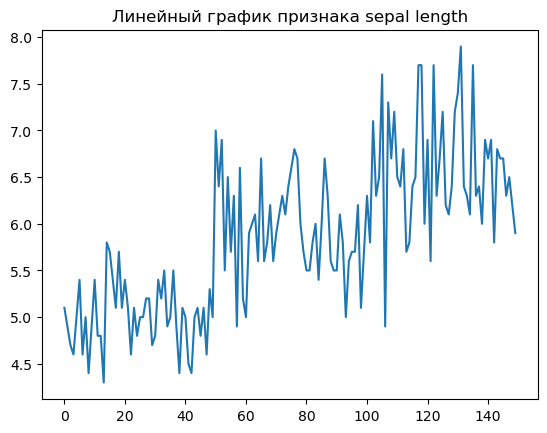

In [116]:
df['sepal length'].plot.line(
    title='Линейный график признака sepal length'
);

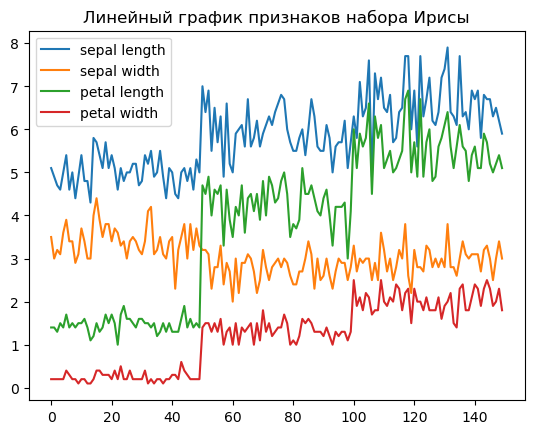

In [117]:
df.plot.line(title='Линейный график признаков набора Ирисы');

__Столбчатая диаграмма__ (bar chart) представляет величины прямоугольными зонами, высоты или длины которых пропорциональны величинам, которые они отображают: 

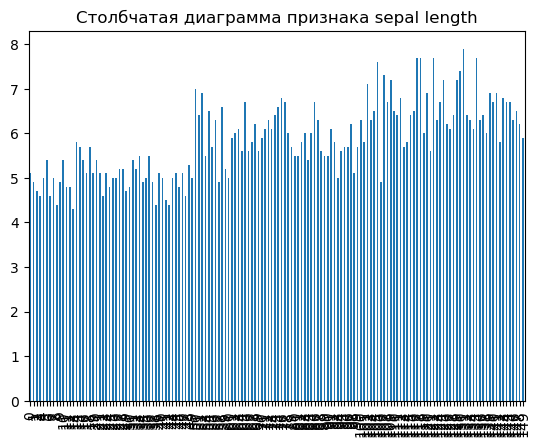

In [118]:
df['sepal length'].plot.bar(
    title='Столбчатая диаграмма признака sepal length'
);

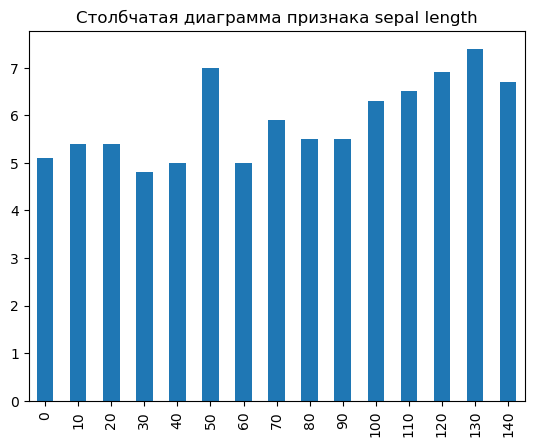

In [119]:
df.iloc[::10]['sepal length'].plot.bar(
    title='Столбчатая диаграмма признака sepal length'
);

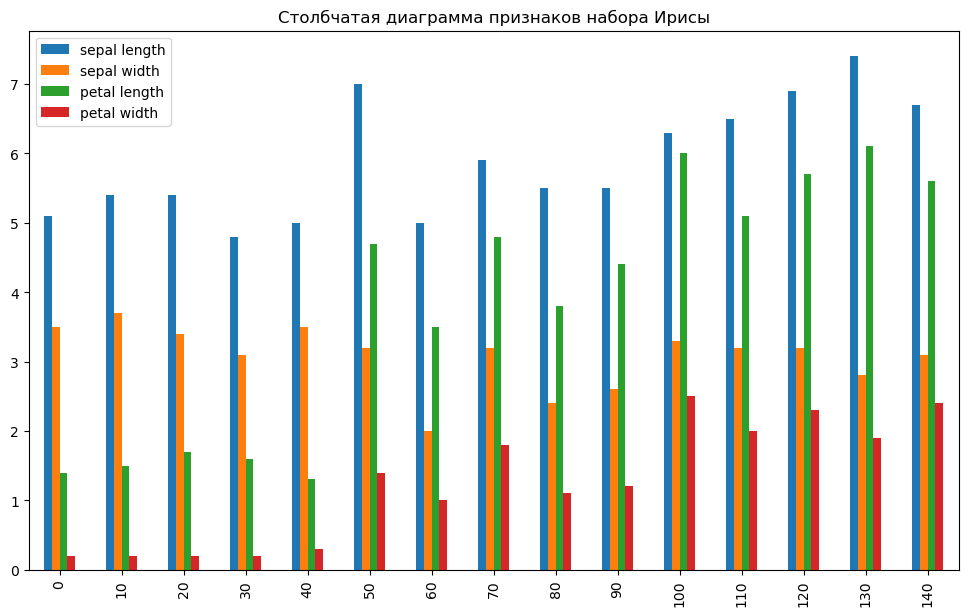

In [120]:
df.iloc[::10].plot.bar(
    title='Столбчатая диаграмма признаков набора Ирисы',figsize=(12,7)
);

__Гистограмма__ (histogram) — это столбчатая диаграмма, в которой высота каждого прямоугольника (или его площадь) пропорциональна числу элементов выборки, попадающих в соответствующий интервал. 

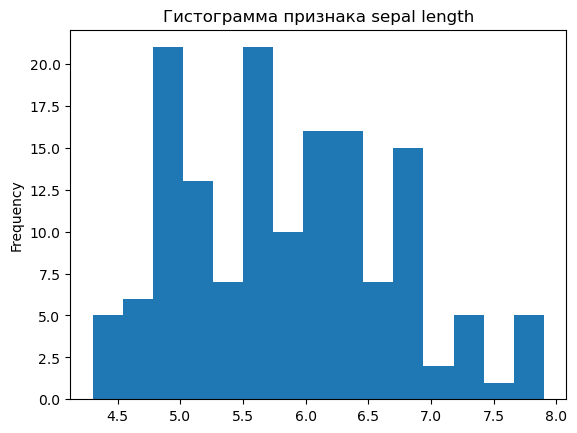

In [121]:
df['sepal length'].plot.hist(
    bins=15,title='Гистограмма признака sepal length'
);

__Диаграмма размаха__ (box plot) в удобной форме показывает медиану (среднее), первый (25%) и третий (75%) квартили, края статистически значимой выборки (минимальное и максимальное значения) и, возможно, выбросы.

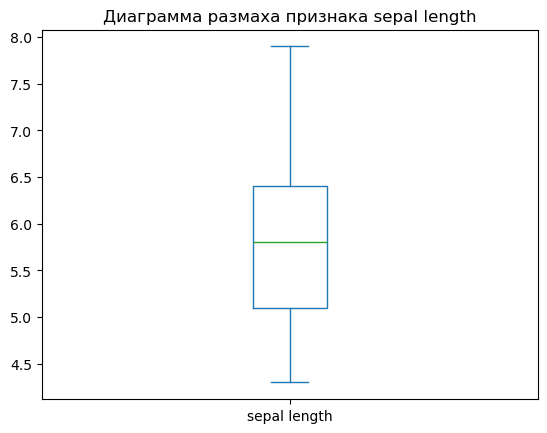

In [122]:
df['sepal length'].plot.box(
    title='Диаграмма размаха признака sepal length'
);

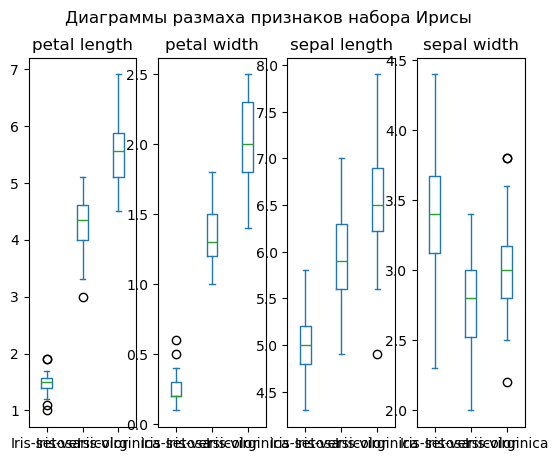

In [123]:
df.plot.box(
    by='class',title='Диаграммы размаха признаков набора Ирисы'
);

__Диаграмма рассеяния__ (scatter plot) изображает значения двух переменных в виде точек на плоскости:

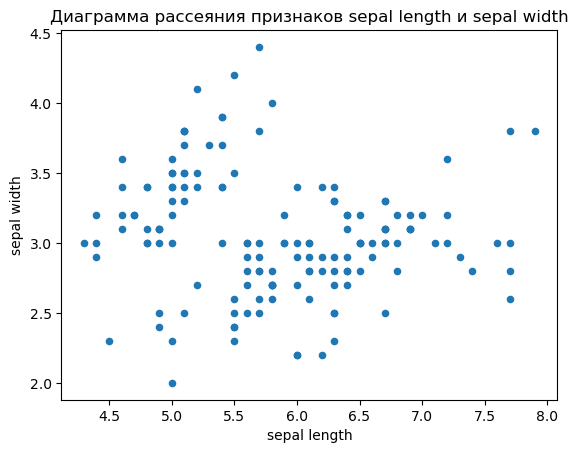

In [124]:
df.plot.scatter(
    'sepal length','sepal width',
    title='Диаграмма рассеяния признаков sepal length и sepal width'
);

## Разведочный анализ данных

Разведочный анализ данных (exploratory data analysis) — анализ основных свойств данных, нахождение в них общих закономерностей, распределений и аномалий, построение моделей данных с использованием инструментов визуализации.

Основные средства разведочного анализа — изучение вероятностных распределений переменных, построение и анализ корреляционных матриц, факторный анализ, дискриминантный анализ.

### Эмпирическая функция и плотность распределения

Пусть рассматривается числовой признак $X$, принимающий значения $x_{i},i=\overline{1,n}.$

Тогда __эмпирическая кумулятивная функция распределения__ (ECDF) задается как

$\hat{F}(x)=\frac{1}{n}\;\sum_{i=1}^{n}I\left(x_{i}\leqslant x\right)$,

где индикаторная переменная $I$ принимает значение $1$, когда указанное в качестве аргумента условие выполняется, или $0$ в противном случае. Для каждой точки $x_{i}$ используется одинаковый коэффициент $\frac{1}{n}$. 

In [ ]:
def ECDF(data, x):
    counter = 0
    for v in data:
        if v <= x:
            counter += 1
    return counter / len(data)

In [126]:
samples = df['sepal length']
npoints = 500
dx = (samples.max()-samples.min())/npoints

xlist = [samples.min()+dx*i for i in range(npoints)]
ylist = [ECDF(samples, x) for x in xlist]

In [127]:
pd.DataFrame(ylist,index=xlist,columns=['sepal length'])

,sepal length
4.3000,0.006667
4.3072,0.006667
4.3144,0.006667
4.3216,0.006667
4.3288,0.006667
...,...
7.8640,0.993333
7.8712,0.993333
7.8784,0.993333
7.8856,0.993333


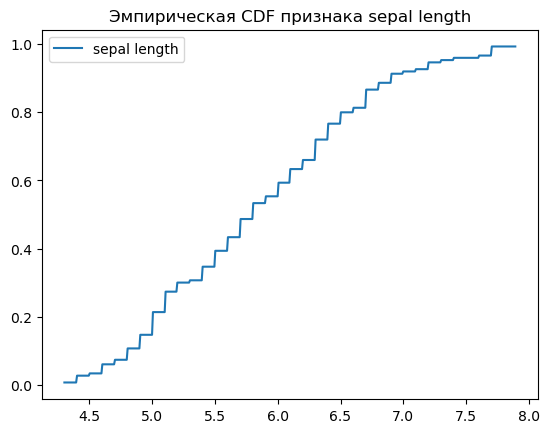

In [128]:
pd.DataFrame(ylist,index=xlist,columns=['sepal length']).plot.line(
    title='Эмпирическая CDF признака sepal length'
);

__Эмпирической плотностью распределения__ (PDF) называется функция

$\hat{f}\left(x\right)=\frac{1}{\triangle x}\left(\hat{F}\left(x+\triangle x\right)-\hat{F}\left(x\right)\right),$

где $\hat{F}\left(x+\triangle x\right)-\hat{F}\left(x\right)$ – это частота попадания значений $x_{i}$ в полуинтервал $\left[x,\,x+\triangle x\right)$.

In [129]:
nbins = 25
dxb = (samples.max()-samples.min())/nbins

xlist = [samples.min()+dxb*i for i in range(nbins)]
zlist = [(ECDF(samples, x+dxb)-ECDF(samples, x))/dx for x in xlist]

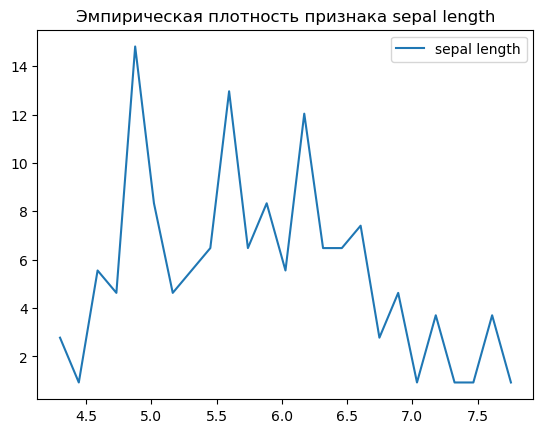

In [ ]:
#plt.plot(xlist, zlist,'r'); # red color
pd.DataFrame(zlist,index=xlist,columns=['sepal length']).plot.line(
    title='Эмпирическая плотность признака sepal length'
);

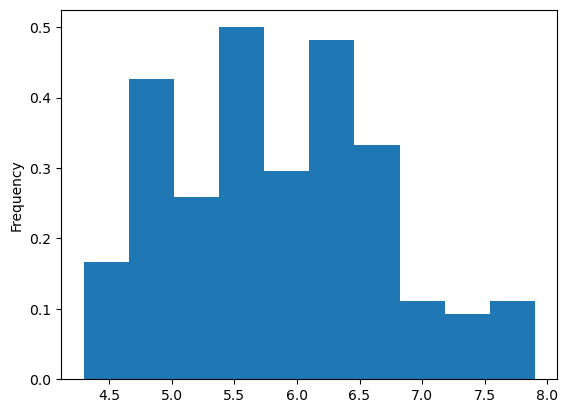

In [131]:
df['sepal length'].plot.hist(density=True);

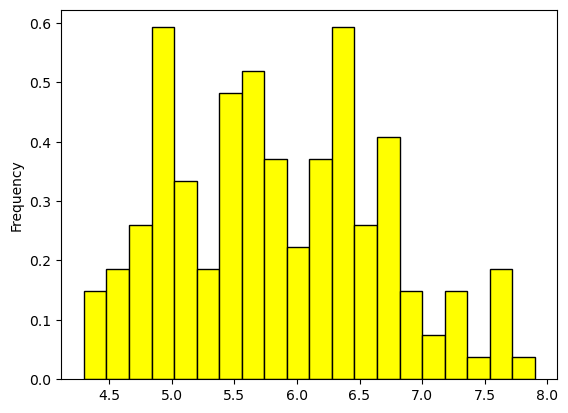

In [132]:
df['sepal length'].plot.hist(
    color = 'yellow', edgecolor = 'black', bins = 20, density=True
);

### Ковариация и корреляция между признаками

__Ковариация__ — это мера линейной зависимости двух случайных величин.

In [133]:
df_num.cov()

,V0,V1,V2,V3
V0,0.685694,-0.039268,1.273682,0.516904
V1,-0.039268,0.188004,-0.321713,-0.117981
V2,1.273682,-0.321713,3.113179,1.296387
V3,0.516904,-0.117981,1.296387,0.582414


__Корреляция__ (корреляция Пирсона) — это статистическая взаимосвязь двух или более случайных величин.

In [134]:
df_num.corr()

,V0,V1,V2,V3
V0,1.000000,-0.109369,0.871754,0.817954
V1,-0.109369,1.000000,-0.420516,-0.356544
V2,0.871754,-0.420516,1.000000,0.962757
V3,0.817954,-0.356544,0.962757,1.000000


## Загрузка котировок акций из Yahoo Finance

Воспользуемся для загрузки котировок акций библиотекой `yfinance` (документация по адресу https://ranaroussi.github.io/yfinance/index.html, репозиторий на GitHub по адресу https://github.com/ranaroussi/yfinance).

In [135]:
import yfinance as yf
import datetime as dt

In [136]:
aapl = yf.download(
    'AAPL', 
    start=dt.datetime(2016, 1, 1), 
    end=dt.datetime(2021, 6, 30),
    auto_adjust=True
)
aapl.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-04,23.776180,23.780695,23.020127,23.157797,270597600
2016-01-05,23.180363,23.889021,23.112657,23.866453,223164000
2016-01-06,22.726734,23.103634,22.539415,22.695138,273829600
2016-01-07,21.767561,22.598091,21.763048,22.270845,324377600
2016-01-08,21.882658,22.367886,21.837521,22.241502,283192000


Извлечем первые записи с котировками за март 2021 г.:

In [137]:
aapl.loc[pd.Timestamp('2021-03-01'):pd.Timestamp('2021-03-31')].head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2021-03-01,124.704124,124.840743,119.824865,120.761682,116307900
2021-03-02,122.098602,125.611668,121.991258,125.309156,102260900
2021-03-03,119.112503,122.674365,118.897814,121.796096,112966300
2021-03-04,117.229095,120.615303,115.755564,118.809978,178155000
2021-03-05,118.487953,118.995400,114.730924,118.058583,153766600


Извлечем первые записи с котировками за 2021 г.:

In [138]:
aapl.loc['2021'].head(15)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2021-01-04,126.096603,130.189064,123.514452,130.101372,143301900
2021-01-05,127.655556,128.366875,125.141613,125.589842,97664900
2021-01-06,123.358536,127.694603,123.144167,124.449862,155088000
2021-01-07,127.567917,128.259745,124.586268,125.073466,109578200
2021-01-08,128.669037,129.234189,126.895628,129.039297,105158200
2021-01-11,125.677589,126.837123,125.209884,125.882219,100384500
2021-01-12,125.502197,126.369409,123.611867,125.209876,91951100
2021-01-13,127.538681,128.084340,125.200137,125.463213,88636800


Нарисуем график котировок закрытия:

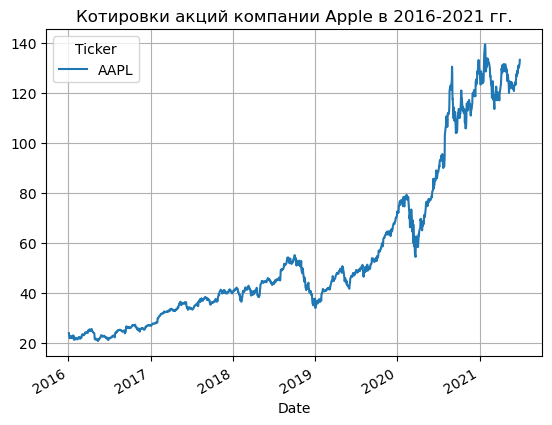

In [139]:
aapl['Close'].plot.line(
    grid=True,title='Котировки акций компании Apple в 2016-2021 гг.'
);

Произведем расчет дневных доходностей акции. Возьмем цены закрытия:

In [140]:
d_close = aapl[['Close']]
d_close

Price,Close
Ticker,AAPL
Date,
2016-01-04,23.776180
2016-01-05,23.180363
2016-01-06,22.726734
2016-01-07,21.767561
2016-01-08,21.882658
...,...
2021-06-23,130.693054
2021-06-24,130.409592


Подсчитаем процентное изменение цены за день:

In [141]:
d_pct_ch = d_close.pct_change()
d_pct_ch

Price,Close
Ticker,AAPL
Date,
2016-01-04,NaN
2016-01-05,-0.025059
2016-01-06,-0.019570
2016-01-07,-0.042205
2016-01-08,0.005288
...,...
2021-06-23,-0.002089
2021-06-24,-0.002169


Произведем расчет другим образом (по явной формуле):

In [142]:
d_pct_ch2 = d_close / d_close.shift(1) - 1
d_pct_ch2

Price,Close
Ticker,AAPL
Date,
2016-01-04,NaN
2016-01-05,-0.025059
2016-01-06,-0.019570
2016-01-07,-0.042205
2016-01-08,0.005288
...,...
2021-06-23,-0.002089
2021-06-24,-0.002169


Оценим характеристики распределения дневных доходностей:

In [143]:
d_pct_ch.describe()

Price,Close
Ticker,AAPL
count,1381.000000
mean,0.001427
std,0.018877
min,-0.128647
25%,-0.006473
50%,0.001001
75%,0.010274
max,0.119809


Наконец, выполним визуализацию в виде гистограммы:

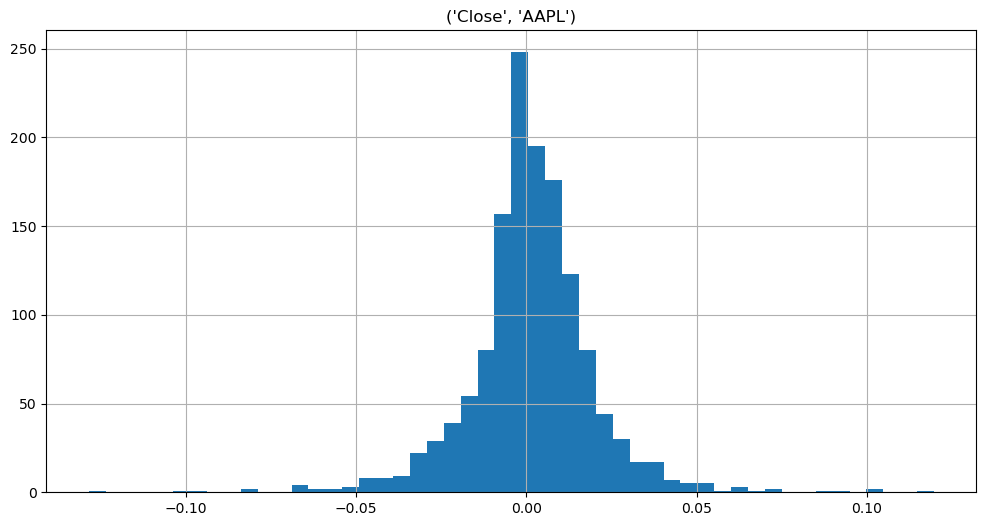

In [144]:
d_pct_ch.hist(bins=50, figsize=(12,6));

Произведем загрузку котировок нескольких акций:

In [145]:
# Define a list of ticker symbols to download
tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']

# Download data for each ticker, grouping by 'Ticker' 
# to structure the DataFrame with multi-level columns
all_data = yf.download(
    tickers, group_by='Ticker', 
    start=dt.datetime(2020, 1, 1), end=dt.datetime(2020, 12, 31), 
    auto_adjust=True
)

# Transform the DataFrame: stack the ticker symbols to create 
# a multi-index (Date, Ticker), then reset the 'Ticker' level 
# to turn it into a column
all_data = all_data.stack(level=0,future_stack=True).\
    rename_axis(['Date', 'Ticker']).reset_index(level=1)
all_data.head()

[*********************100%***********************]  4 of 4 completed


Price,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2020-01-02,GOOG,66.621590,67.942052,66.621590,67.903816,28132000
2020-01-02,MSFT,151.040826,152.895777,150.612762,152.791138,22622100
2020-01-02,AAPL,71.545920,72.598922,71.292334,72.538544,135480400
2020-01-02,IBM,100.253290,100.936502,100.082493,100.565193,3293436
2020-01-03,GOOG,66.934945,68.158574,66.819933,67.570595,23728000


При сбрасывании индекса строк компоненты индекса становятся обычными столбцами:

In [146]:
all_data[['Ticker','Close']].reset_index()

Price,Date,Ticker,Close
0,2020-01-02,GOOG,67.903816
1,2020-01-02,MSFT,152.791138
2,2020-01-02,AAPL,72.538544
3,2020-01-02,IBM,100.565193
4,2020-01-03,GOOG,67.570595
...,...,...,...
1003,2020-12-29,IBM,96.757462
1004,2020-12-30,GOOG,86.384842
1005,2020-12-30,MSFT,213.108871
1006,2020-12-30,AAPL,130.296249


Построим датафрейм с ценами акций в различные дни:

In [147]:
daily_close_pr = all_data[['Ticker','Close']].reset_index().pivot(
    index='Date', columns='Ticker', values='Close'
)
daily_close_pr

Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,
2020-01-02,72.538544,67.903816,100.565193,152.791138
2020-01-03,71.833305,67.570595,99.763176,150.888626
2020-01-06,72.405685,69.236702,99.584938,151.278610
2020-01-07,72.065147,69.193481,99.651764,149.899307
2020-01-08,73.224411,69.738762,100.483505,152.286957
...,...,...,...,...
2020-12-23,127.606918,86.030273,96.835602,212.474411
2020-12-24,128.591003,86.351562,97.453026,214.137527
2020-12-28,133.190186,88.200920,97.554657,216.262085


Построим датафрейм с дневными доходностями акций (кроме первого дня): 

In [148]:
daily_pct_change = daily_close_pr.pct_change()
daily_pct_change

Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.004907,-0.007975,-0.012452
2020-01-06,0.007968,0.024657,-0.001787,0.002585
2020-01-07,-0.004703,-0.000624,0.000671,-0.009118
2020-01-08,0.016086,0.007881,0.008346,0.015928
...,...,...,...,...
2020-12-23,-0.006976,0.005152,0.002346,-0.013039
2020-12-24,0.007712,0.003735,0.006376,0.007827
2020-12-28,0.035766,0.021417,0.001043,0.009921


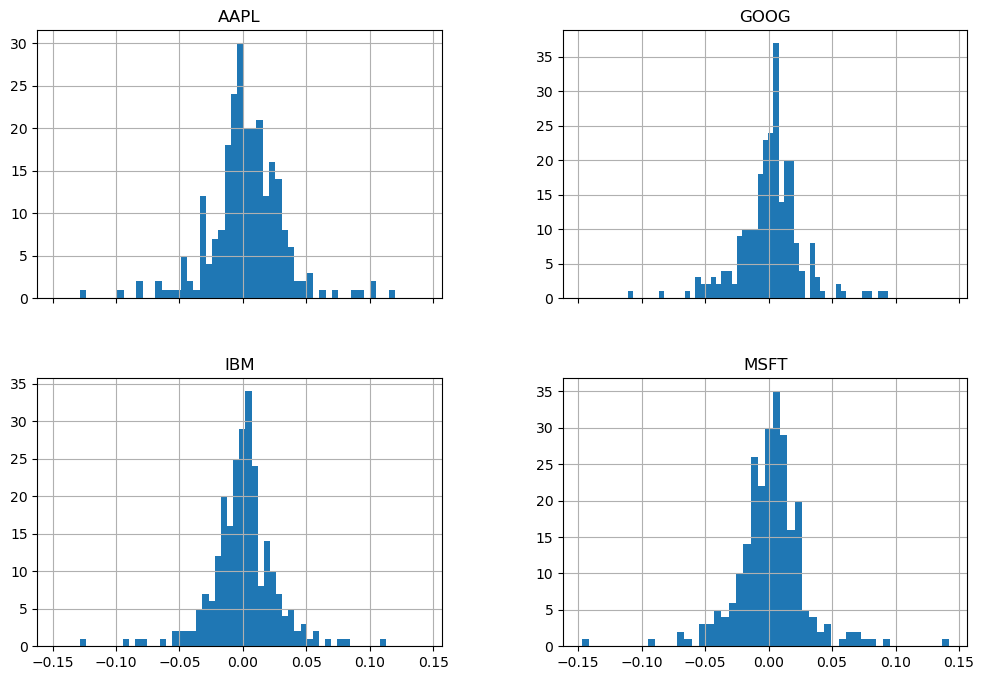

In [149]:
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8));

### Задание на лабораторную работу

В соответствии с индивидуальным заданием (вариантом), переданным через программу «Мессенджер Яндекс», выполните следующие работы:

1. При помощи модуля `yfinance` считайте котировки указанных в индивидуальным задании ценных бумаг за указанный период времени.
2. Вычислите дневные доходности ценных бумаг и визуализируйте динамику ценной бумаги на графике.
3. В соответствии с индивидуальным заданием визуализируйте дневную доходность ценной бумаги на графике.
4. В соответствии с индивидуальным заданием постройте и визуализируйте эмпирическую функцию распределения или эмпирическую плотность распределения дневной доходности ценной бумаги.
5. В соответствии с индивидуальным заданием визуализируйте диаграмму рассеяния для пары ценных бумаг.


In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(daily_pct_change["TSLA"], daily_pct_change["UEC"], alpha=0.5)
plt.xlabel("TSLA daily returns")
plt.ylabel("UEC daily returns")
plt.title("Диаграмма рассеяния: TSLA vs UEC")
plt.grid(True)
plt.show()